# Notebook de l'analyse exploratoire

# Sommaire:


**Objectif**

**<a href="#C1">I) Création des dataframes principaux (commandes et clients)</a>**
- <a href="#C2"> A) Importation et jointure des tables de la base de données</a>
- <a href="#C3"> B) Données agrégées par commandes et par clients</a>
- <a href="#C4"> C) Données agrégées par clients</a>
&nbsp;

**<a href="#C5">II) Analyse exploratoire</a>**
- <a href="#C6"> A) Analyse de la répartition empirique</a>
- <a href="#C7"> B) Analyse du CA, nombre de commandes et nombre de clients au cours du temps</a>
- <a href="#C8"> C) Gestion des valeurs manquantes</a>
- <a href="#C9"> D) Transformation de variables</a>
- <a href="#C10"> E) Analyse de la relation entre les variables</a>

&nbsp;

***

# **Objectif**

**Contexte :**

L’e-commerce brésilien Olist souhaite fournir à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

**Mission :** 
- Réaliser une segmentation afin de comprendre les différents types d’utilisateurs grâce à leur comportement et données personnelles.
- Décrire les différents groupes de clients obtenus
- Proposer un contrat de maintenance basé sur la stabilité des segments au cours du temps. 

Afin de répondre à ces trois missions, trois notebook ont été réalisé : 
- Notebook 1 : Analyse exploratoire 
- Notebook 2 : Essai des différents modèles de clustering et description des cluster pour le meilleur modèle
- Notebook 3 : Détermination de la période de maintenance du modèle. 

Ce Premier Notebook présente la démarche de création des jeux de données à partir des tables de la base de données, puis les différentes étapes de l'analyse exploratoire

# <a name="C1"> I) Création des dataframes principaux (commandes et clients)</a>

In [1]:
# importation des librairies de bases
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

### <a name="C2"> A) Importation et jointure des tables de la base de données</a>

In [2]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(r'data', "*.csv"))

list_of_dfs = []

for f in csv_files:
    df = pd.read_csv(f)
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Content:')
    print(df.info())
    print(" ")
    print('#########'*10)
    print(" ")
    list_of_dfs.append(df)

Location: data\olist_customers_dataset.csv
File Name: olist_customers_dataset.csv
Content:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
 
##########################################################################################
 
Location: data\olist_geolocation_dataset.csv
File Name: olist_geolocation_dataset.csv
Content:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  -

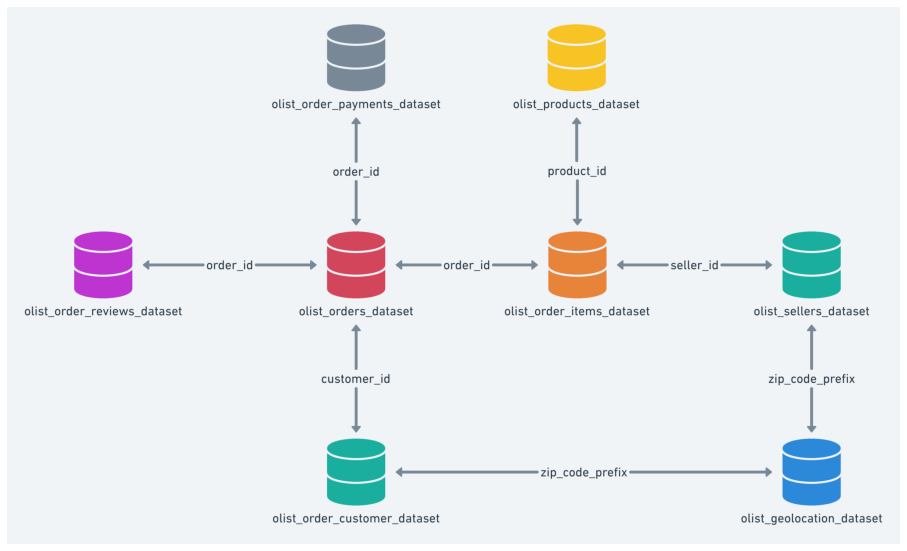

In [3]:
plt.figure(figsize=(16, 16))
image = plt.imread("HRhd2Y0.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
# Affichage de la liste des jeux de données (important pour l'ordre des data dans list_of_df)
csv_files

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [5]:
# olist_customers_dataset.csv
list_of_dfs[0] = list_of_dfs[0][['customer_id',
                                 'customer_unique_id', 'customer_state']]

# olist_geolocation_dataset.csv
# Pas de selection pour le moment

# olist_orders_dataset.csv
list_of_dfs[2] = list_of_dfs[2][['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
                                 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

# olist_order_items_dataset.csv
list_of_dfs[3] = list_of_dfs[3][['order_id', 'price',
                                 'product_id', 'order_item_id']]

# olist_order_payments_dataset.csv
# Pas de selection pour le moment

# olist_order_reviews_dataset.csv
list_of_dfs[5] = list_of_dfs[5][['order_id', 'review_score']]

# olist_products_dataset.csv
# Pas de selection pour le moment

# olist_sellers_dataset.csv
# Pas de selection pour le moment

# product_category_name_translation.csv
# Pas de selection pour le moment

In [6]:
# Jointure des données par order_id
dfs = [list_of_dfs[2], list_of_dfs[3], list_of_dfs[5]]
df_merged = reduce(lambda left, right: pd.merge(
    left, right, on='order_id', how='outer'), dfs)

# Jointure des données par customer_id
df_merged = pd.merge(df_merged, list_of_dfs[0], on='customer_id', how='outer')

In [7]:
# Changement de format des dates

lst_var_date = ['order_approved_at',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for var in lst_var_date:
    df_merged[var] = pd.to_datetime(
        df_merged[var], errors='coerce').dt.normalize()

# Création d'une variable : temps de livraison
df_merged['Delivery_Time'] = (
    df_merged['order_delivered_customer_date'] - df_merged['order_approved_at']).dt.days

In [8]:
# Aperçu du nom des colonnes
df_merged.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'price', 'product_id', 'order_item_id',
       'review_score', 'customer_unique_id', 'customer_state',
       'Delivery_Time'],
      dtype='object')

In [9]:
# Affichage des status des commandes
df_merged['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [10]:
# Sauvegarde des commandes annulées
cancel_order = df_merged[df_merged.order_status == 'canceled']

# Suppression des commandes annulées et non disponible
df_merged = df_merged[(df_merged.order_status != 'canceled') & (
    df_merged.order_status != 'unavailable')]

In [11]:
# Apercu des données
df_merged[['Delivery_Time', 'customer_id', 'price', 'product_id', 'review_score',
           'order_id', 'order_approved_at', 'customer_state']].head()

,Delivery_Time,customer_id,price,product_id,review_score,order_id,order_approved_at,customer_state
0,8.0,9ef432eb6251297304e76186b10a928d,29.99,87285b34884572647811a353c7ac498a,4.0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,SP
1,12.0,b0830fb4747a6c6d20dea0b8c802d7ef,118.70,595fac2a385ac33a80bd5114aec74eb8,4.0,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26,BA
2,9.0,41ce2a54c0b03bf3443c3d931a367089,159.90,aa4383b373c6aca5d8797843e5594415,5.0,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,GO
3,14.0,f88197465ea7920adcdbec7375364d82,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,5.0,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,RN
4,3.0,8ab97904e6daea8866dbdbc4fb7aad2c,19.90,65266b2da20d04dbe00c5c2d3bb7859e,5.0,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,SP


### <a name="C3"> B) Données agrégées par commandes et par clients</a>

In [12]:
# Création du jeu de données agrégé par commande et client

df_Customers_order = df_merged[['Delivery_Time',
                                'customer_unique_id',
                                'price',
                                'product_id',
                                'review_score',
                                'order_id',
                                'order_approved_at',
                                'customer_state'
                                ]]\
    .groupby(['customer_unique_id', 'order_id'])\
    .agg({'Delivery_Time': 'mean',  # temps moyen de livraison
          'review_score': 'mean',  # note moyenne
          'price': 'mean',  # prix moyen de la commande
          'order_approved_at': 'max',  # Date de la commande
          'customer_state': 'max',  # Pays du client
          'product_id': 'count'})  # nombre de produits par commande

# Création d'une colonne reprenant la somme totale
df_Customers_order['Sum_tot'] = df_merged[['customer_unique_id', 'order_id', 'price']].groupby(
    ['customer_unique_id', 'order_id']).agg('sum')
df_Customers_order = df_Customers_order.reset_index()

In [13]:
df_Customers_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98207 entries, 0 to 98206
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  98207 non-null  object        
 1   order_id            98207 non-null  object        
 2   Delivery_Time       96456 non-null  float64       
 3   review_score        97473 non-null  float64       
 4   price               98199 non-null  float64       
 5   order_approved_at   98188 non-null  datetime64[ns]
 6   customer_state      98207 non-null  object        
 7   product_id          98207 non-null  int64         
 8   Sum_tot             98207 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 6.7+ MB


### <a name="C4"> C) Données agrégées par clients</a>

In [14]:
# Création du jeu de données agrégé par client
df_Customers = df_Customers_order.groupby('customer_unique_id')\
    .agg({'Delivery_Time': 'mean',  # temps moyen de livraison
          'review_score': 'mean',  # note moyenne
          'price': 'mean',  # prix moyen des commandes
          'order_approved_at': 'min',  # date de la 1ere commande
          'Sum_tot': 'sum'}).round(2)  # Dépense totale

# Renommage des colonnes
df_Customers.columns = ['mean_delivery_time',
                        'mean_review_score',
                        'mean_price_cart',
                        'first_order',
                        'total_expanse']

# Date de la dernière commande
df_Customers['last_order'] = df_Customers_order.groupby(
    'customer_unique_id').agg({'order_approved_at': 'max'})

# Calcule de l'ancienneté (date du jour - date du premier achat)
df_Customers['seniority'] = (
    df_Customers["last_order"].max() - df_Customers['first_order']).dt.days

# Récence (date du jour - date du dernier achat)
df_Customers['recency'] = (
    df_Customers["last_order"].max() - df_Customers['last_order']).dt.days

# Nombre de commande totale
df_Customers['nb_order'] = df_Customers_order.groupby(
    'customer_unique_id').agg({'order_id': 'count'})

# Nombre moyen d'article par panier
df_Customers['mean_nb_item'] = df_Customers_order.groupby(
    'customer_unique_id').agg({'product_id': 'mean'}).round(2)

In [15]:
# Montant de la dernière commande
price_last_order = df_merged.sort_values('order_approved_at').groupby(
    'customer_unique_id')['price'].agg(['last']).reset_index()

df_Customers = df_Customers.merge(
    price_last_order, on='customer_unique_id', how='left')
df_Customers.rename(columns={'last': 'last_order_price'}, inplace=True)

In [16]:
# Mise des clients en tant qu'index
df_Customers = df_Customers.set_index('customer_unique_id')

In [17]:
# Suppression de la mémoire des dataframes temporaires

import gc

del [[df, dfs,
      list_of_dfs,
      price_last_order]]
gc.collect()

2991

# <a name="C5"> II - Analyse Exploratoire</a>

### <a name="C6"> A) Analyse de la répartition empirique</a>

In [18]:
# Résumé du df d"intérêt
df_Customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94990 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mean_delivery_time  93337 non-null  float64       
 1   mean_review_score   94305 non-null  float64       
 2   mean_price_cart     94983 non-null  float64       
 3   first_order         94973 non-null  datetime64[ns]
 4   total_expanse       94990 non-null  float64       
 5   last_order          94973 non-null  datetime64[ns]
 6   seniority           94973 non-null  float64       
 7   recency             94973 non-null  float64       
 8   nb_order            94990 non-null  int64         
 9   mean_nb_item        94990 non-null  float64       
 10  last_order_price    94983 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1)
memory usage: 8.7+ MB


In [19]:
# Affichage des statistiques

lst_variables = ['mean_delivery_time',
                 'mean_review_score',
                 'mean_price_cart',
                 'total_expanse',
                 'seniority',
                 'recency',
                 'nb_order',
                 'mean_nb_item',
                 'last_order_price']

df_Customers[lst_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_delivery_time,93337.0,11.993031,9.525424,-7.00,6.00,10.00,15.00,208.0
mean_review_score,94305.0,4.114039,1.316086,1.00,4.00,5.00,5.00,5.0
mean_price_cart,94983.0,126.297982,190.867691,0.85,42.90,79.17,139.90,6735.0
total_expanse,94990.0,142.690760,217.298882,0.00,47.90,89.90,155.97,13440.0
seniority,94973.0,245.455814,153.467078,5.00,121.00,227.00,355.00,718.0
recency,94973.0,242.789761,152.968788,0.00,119.00,224.00,352.00,718.0
nb_order,94990.0,1.033867,0.210826,1.00,1.00,1.00,1.00,16.0
mean_nb_item,94990.0,1.142624,0.532372,0.00,1.00,1.00,1.00,21.0
last_order_price,94983.0,126.277537,191.446258,0.85,41.99,79.00,139.90,6735.0


In [20]:
# Le temps de livraison est négatif pour certains clients
df_Customers['mean_delivery_time'] = np.where(
    df_Customers['mean_delivery_time'] < 0, 0, df_Customers['mean_delivery_time'])

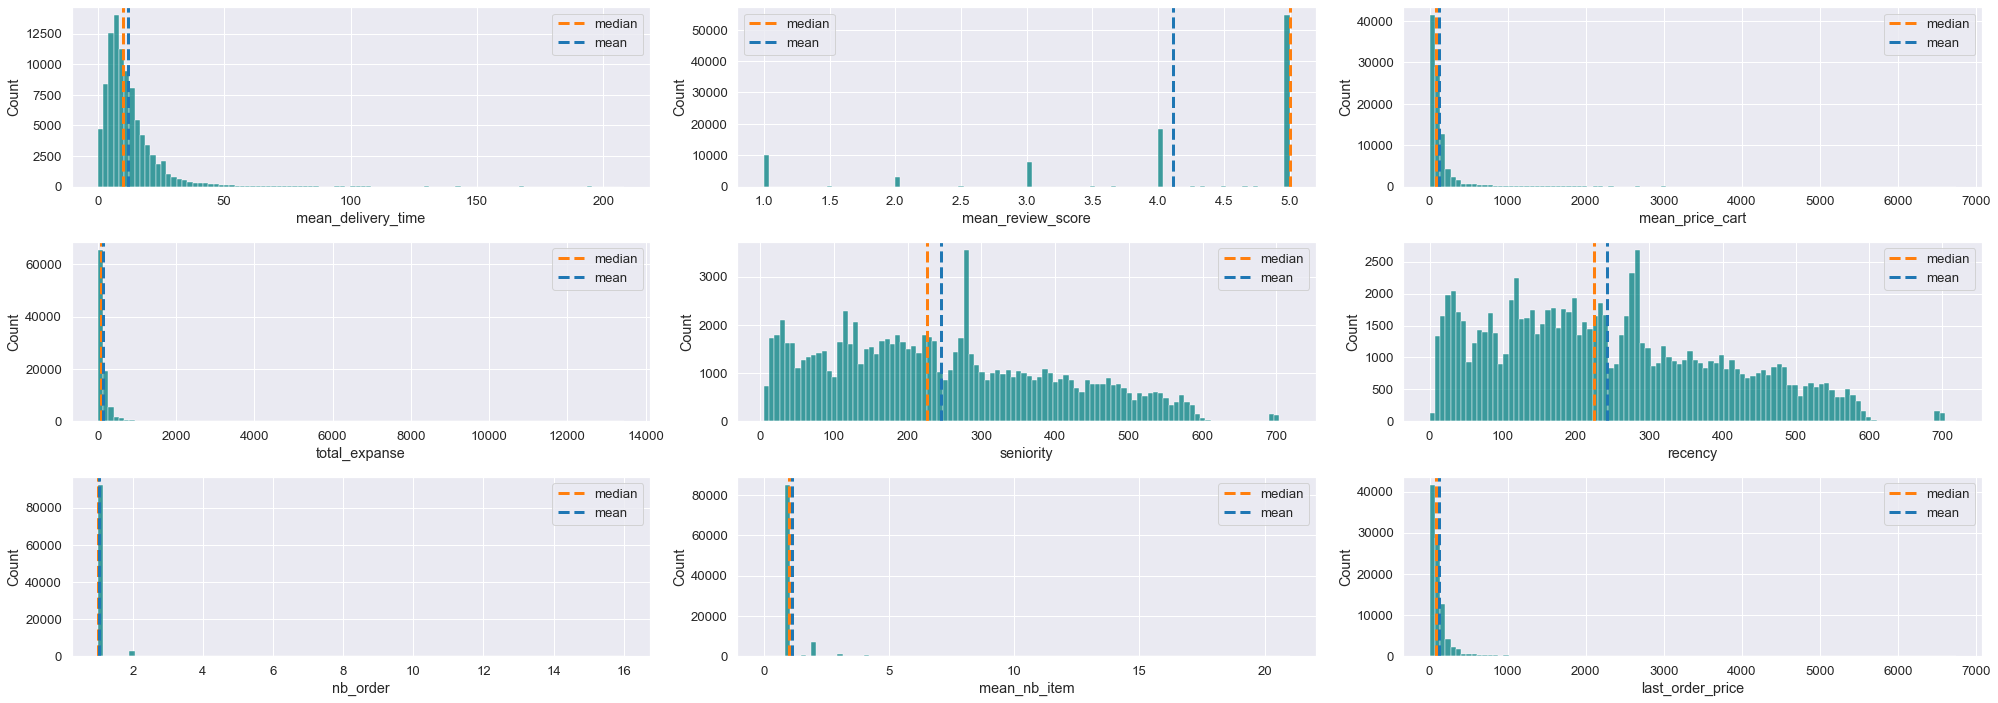

In [21]:
# Le temps de livraison est négatif pour certains clients


lst_variables = ['mean_delivery_time',
                 'mean_review_score',
                 'mean_price_cart',
                 'total_expanse',
                 'seniority',
                 'recency',
                 'nb_order',
                 'mean_nb_item',
                 'last_order_price']

sns.set(font_scale=1.2)

plt.figure(figsize=(28, 10))
i = 0
for var in lst_variables:
    ax = plt.subplot(3, 3, i + 1)
    g = sns.histplot(data=df_Customers, x=var,
                     bins=100,
                     color="teal")

    # vertical lines : moyenne et médiane
    median = df_Customers[var].median()
    mean = df_Customers[var].mean()
    g.axvline(x=median, color='tab:orange', linestyle='dashed', linewidth=3)
    g.axvline(x=mean, color='tab:blue', linestyle='dashed', linewidth=3)
    labels = ["median", "mean"]
    plt.legend(labels=labels)
    i += 1
plt.tight_layout()

### <a name="C7"> B) Analyse du CA, nombre de commandes et nombre de clients au cours du temps</a>

##### 1) Analyse du Chiffre d'Affaires

In [22]:
CA_time = df_Customers_order[["order_approved_at", "Sum_tot"]].groupby(
    "order_approved_at").sum().reset_index()
CA_time = CA_time.sort_values(by=['order_approved_at'])

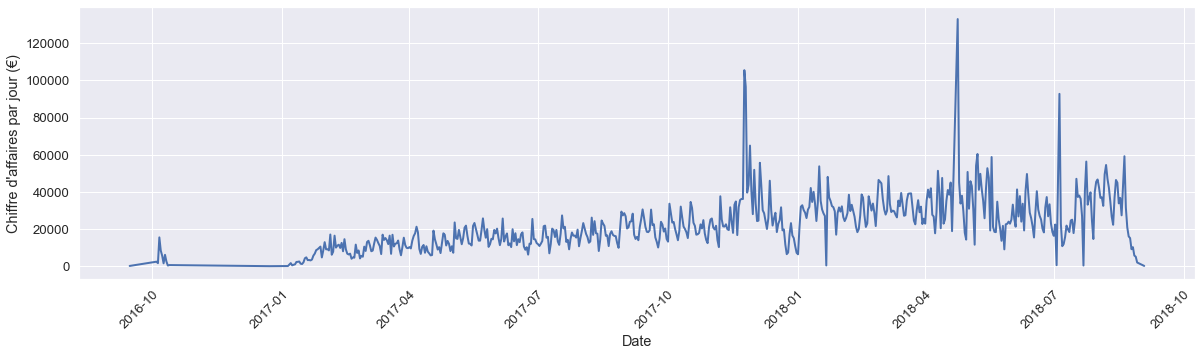

In [23]:
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='Sum_tot',
             data=CA_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires par jour (€)")
plt.show()

In [24]:
CA_time['CumSum'] = np.cumsum(CA_time["Sum_tot"])/1000

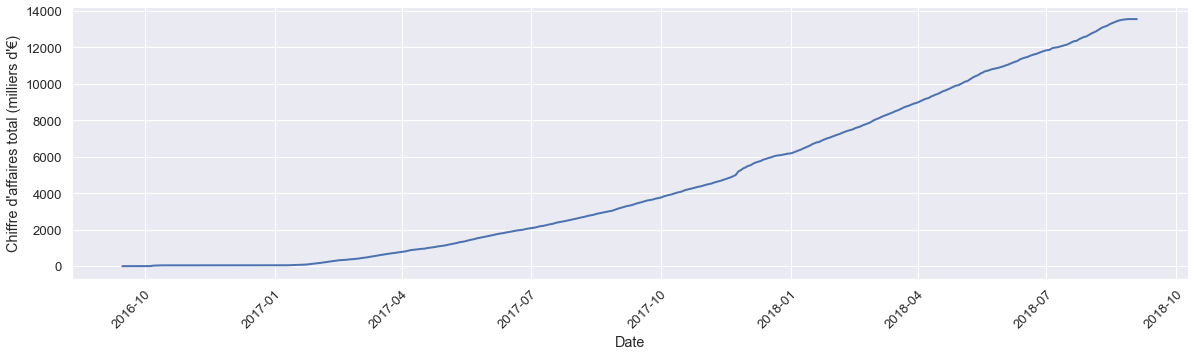

In [25]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='CumSum',
             data=CA_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires total (milliers d'€)")
plt.show()

##### 2) Nouveaux clients au cours du temps

In [26]:
Custo_time = df_Customers_order[["order_approved_at", "customer_unique_id"]].groupby(
    "order_approved_at").count().reset_index()
Custo_time = Custo_time.sort_values(by=['order_approved_at'])

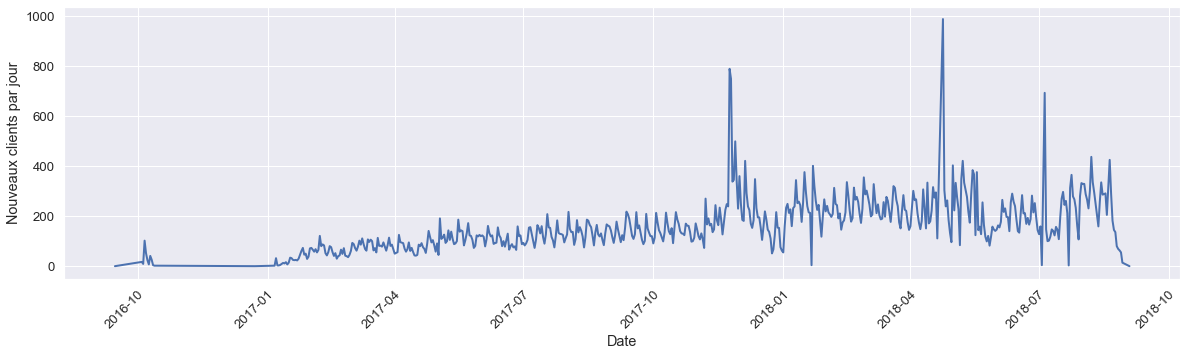

In [27]:
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='customer_unique_id',
             data=Custo_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nouveaux clients par jour")
plt.show()

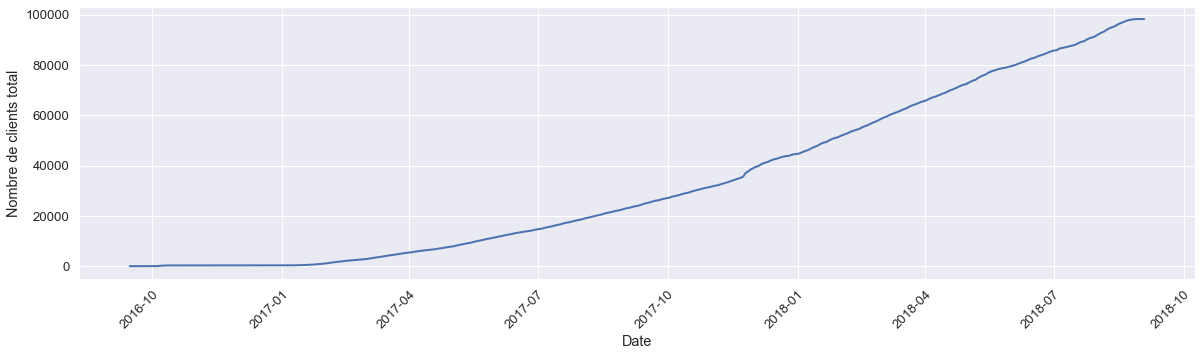

In [28]:
Custo_time['CumSum'] = np.cumsum(Custo_time["customer_unique_id"])

sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='CumSum',
             data=Custo_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nombre de clients total")
plt.show()

##### 3) Nombre de commandes au cours du temps

In [29]:
Order_time = df_Customers_order[["order_approved_at", "order_id"]].groupby(
    "order_approved_at").count().reset_index()
Order_time = Order_time.sort_values(by=['order_approved_at'])

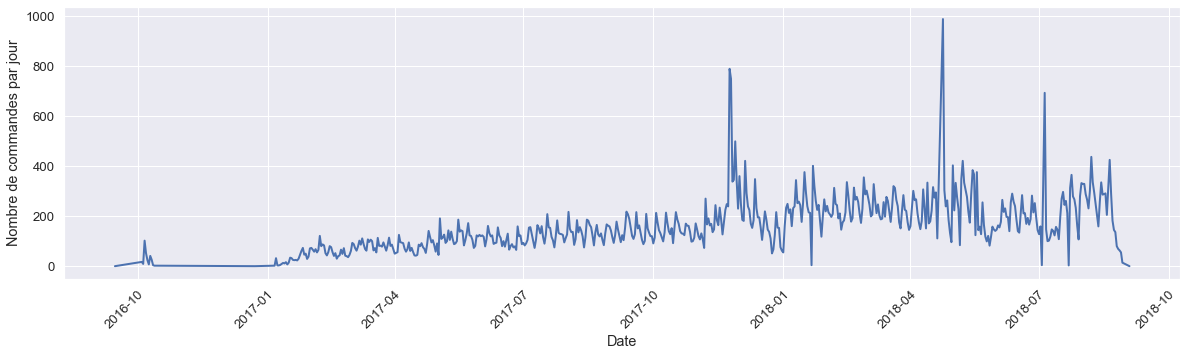

In [30]:
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='order_id',
             data=Order_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nombre de commandes par jour")
plt.show()

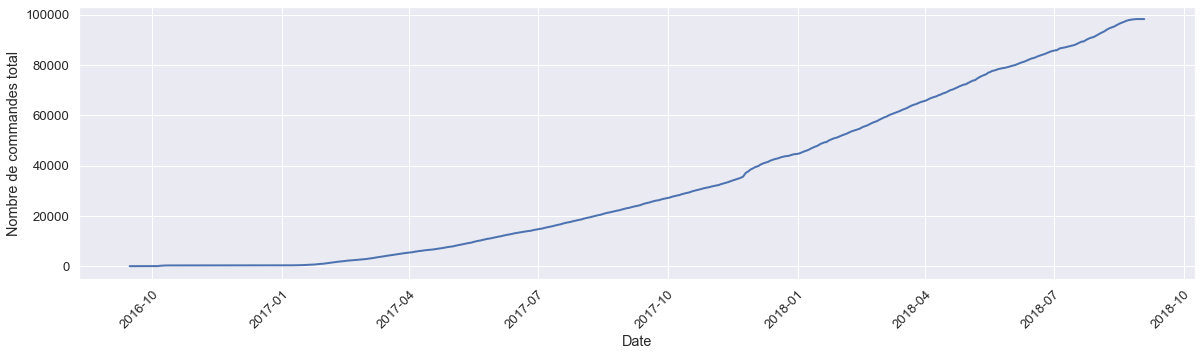

In [31]:
Order_time['CumSum'] = np.cumsum(Order_time["order_id"])

sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='CumSum',
             data=Order_time,
             linewidth=2,
             ci=None)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Nombre de commandes total")
plt.show()

##### 4) Répartition des clients avec 1 commande ou plus

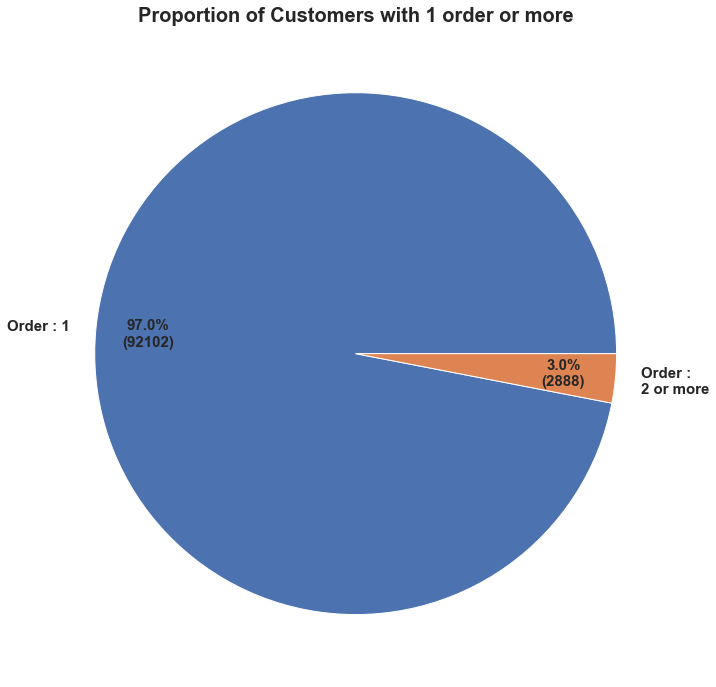

In [32]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format


group_order = np.where(df_Customers['nb_order'] > 1, '2 or more', '1')
group_order = pd.Series(group_order)

plt.figure(figsize=(12, 12))
explode = (0, 0, 0, 0.22, 0.22, 0)

plt.pie(group_order.value_counts(), labels=['Order : '+'1', 'Order : ' + "\n"+'2 or more'],
        autopct=autopct_format(group_order.value_counts()), pctdistance=0.8, labeldistance=1.1, textprops={'fontsize': 15, 'weight': "bold"})

plt.title('Proportion of Customers with 1 order or more',
          fontsize=20, weight='bold')
plt.show()

##### 5) Courbe de Lorenz

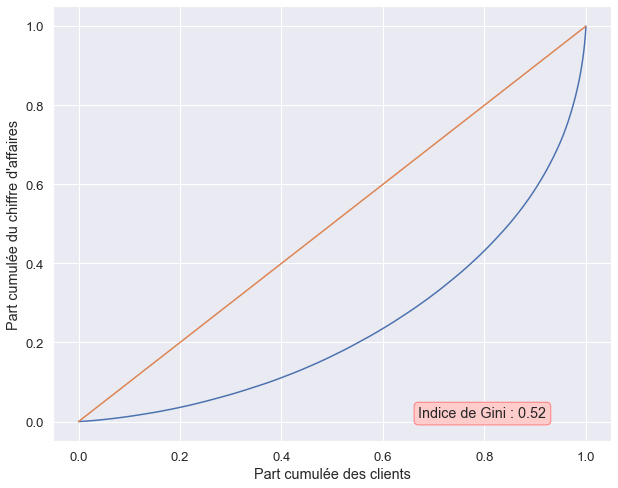

L'indice de gini est de : 0.52


In [33]:
# Calcul de la part cumulée du chiffre d'affaires :
client_CA_prix = df_Customers['total_expanse'].values
n = len(client_CA_prix)
lorenz = np.cumsum(np.sort(client_CA_prix)) / client_CA_prix.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

# Calcul de l'indice de Gini, allant de 0 (C.A. équilibré entre les clients) à 1 (C.A. dédéquilibré entre les clients)
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

# Représentation graphique et création de l'axe x (part cumulée des clients)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
xaxis = np.linspace(0-1/n, 1+1/n, len(lorenz))  # Part cumulée des clients
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.plot([0, 1], [0, 1])  # tracer la bisséctrice
plt.xlabel("Part cumulée des clients")
plt.ylabel("Part cumulée du chiffre d'affaires")
plt.text(0.67, .01, f'Indice de Gini : {round(gini,2)}',
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

print("L'indice de gini est de :", round(gini, 2))

### <a name="C7"> C) Gestion des valeurs manquantes </a>

In [34]:
print(df_Customers.isna().sum())

mean_delivery_time    1653
mean_review_score      685
mean_price_cart          7
first_order             17
total_expanse            0
last_order              17
seniority               17
recency                 17
nb_order                 0
mean_nb_item             0
last_order_price         7
dtype: int64


In [35]:
(df_Customers.isna().sum()/df_Customers.shape[0]).sort_values(ascending=False)

mean_delivery_time    0.017402
mean_review_score     0.007211
first_order           0.000179
last_order            0.000179
seniority             0.000179
recency               0.000179
mean_price_cart       0.000074
last_order_price      0.000074
total_expanse         0.000000
nb_order              0.000000
mean_nb_item          0.000000
dtype: float64

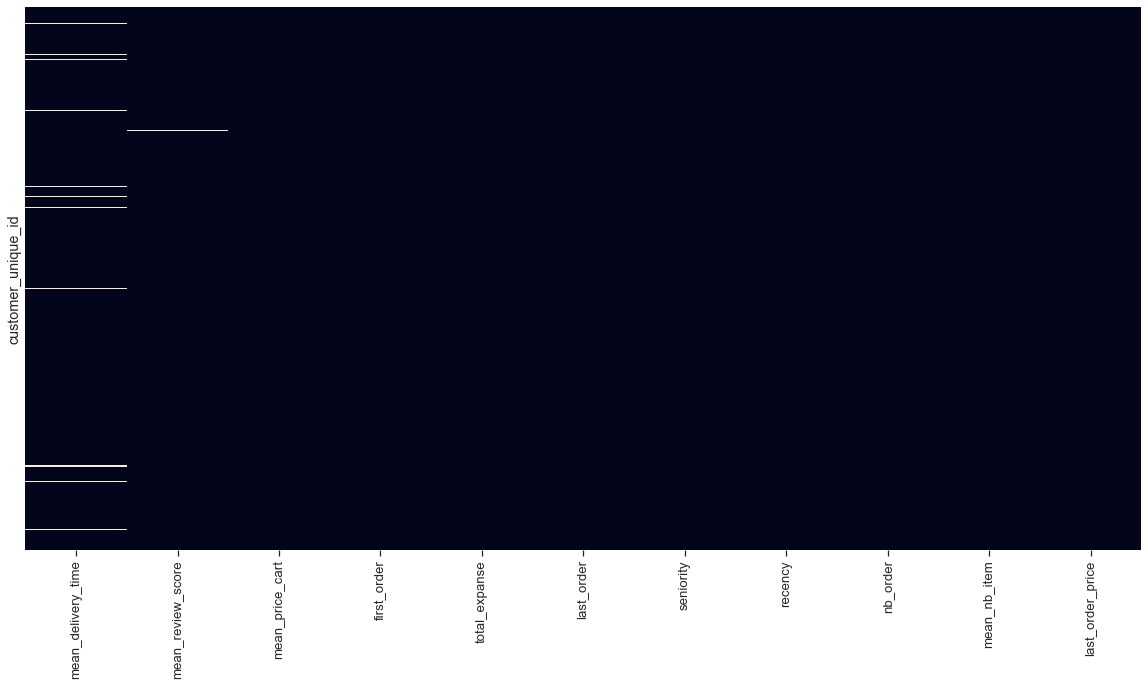

In [36]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(df_Customers.isna(), cbar=False, yticklabels=False)
ax.tick_params(left=False, bottom=True)

In [37]:
# Imputation des valeurs manquantes par la médiane

from sklearn.impute import SimpleImputer

Imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
df_Customers[lst_variables] = Imputer_median.fit_transform(
    df_Customers[lst_variables])

### <a name="C8"> D) Transformation de variables </a>

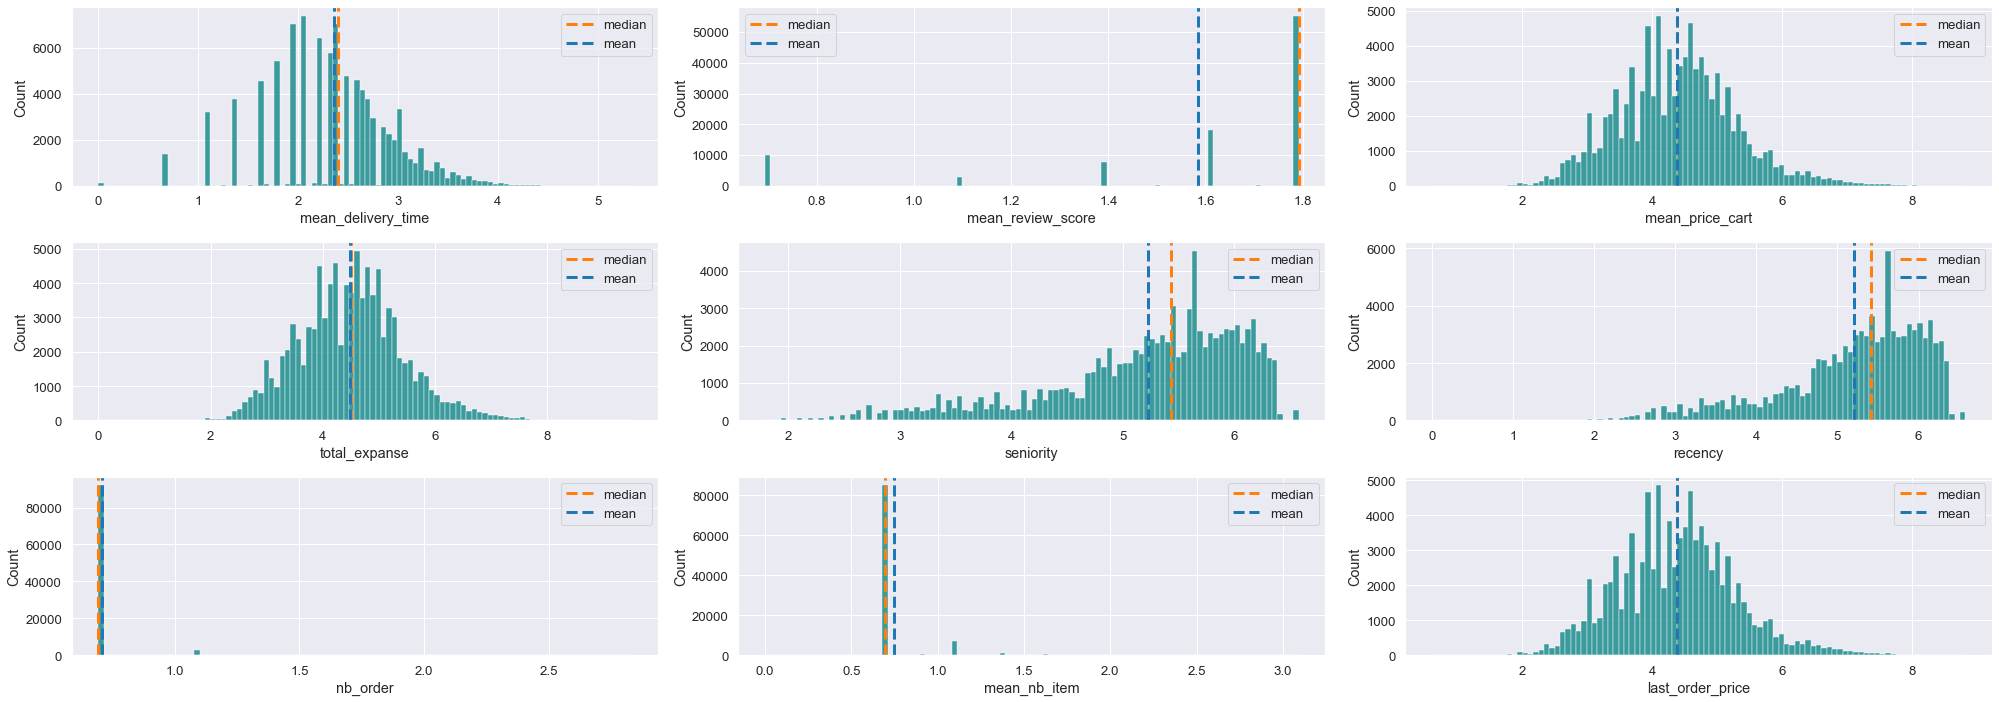

In [38]:
# Aperçu de la transformation log sur toutes les variables

lst_variables = ['mean_delivery_time',
                 'mean_review_score',
                 'mean_price_cart',
                 'total_expanse',
                 'seniority',
                 'recency',
                 'nb_order',
                 'mean_nb_item',
                 'last_order_price']

df_Customers_log = df_Customers[lst_variables].copy()
df_Customers_log[lst_variables] = np.log1p(df_Customers_log[lst_variables])

sns.set(font_scale=1.2)

plt.figure(figsize=(28, 10))
i = 0
for var in lst_variables:
    ax = plt.subplot(3, 3, i + 1)
    g = sns.histplot(data=df_Customers_log, x=var,
                     bins=100,
                     color="teal")

    # Lignes verticales : médiane et moyenne
    median = df_Customers_log[var].median()
    mean = df_Customers_log[var].mean()
    g.axvline(x=median, color='tab:orange', linestyle='dashed', linewidth=3)
    g.axvline(x=mean, color='tab:blue', linestyle='dashed', linewidth=3)
    labels = ["median", "mean"]
    plt.legend(labels=labels)
    i += 1
plt.tight_layout()

In [39]:
# transformation en log des variables spécifiques

lst_log = ['mean_delivery_time',
           'mean_price_cart',
           'total_expanse',
           'seniority',
           'recency',
           'last_order_price']

df_Customers[lst_log] = np.log1p(df_Customers[lst_log])


df_Customers.rename(columns={'mean_delivery_time': 'mean_delivery_time_log',
                             'mean_price_cart': 'mean_price_cart_log',
                             'total_expanse': 'total_expanse_log',
                             'seniority': 'seniority_log',
                             'recency': 'recency_log',
                             'last_order_price': 'last_order_price_log'
                             }, inplace=True)

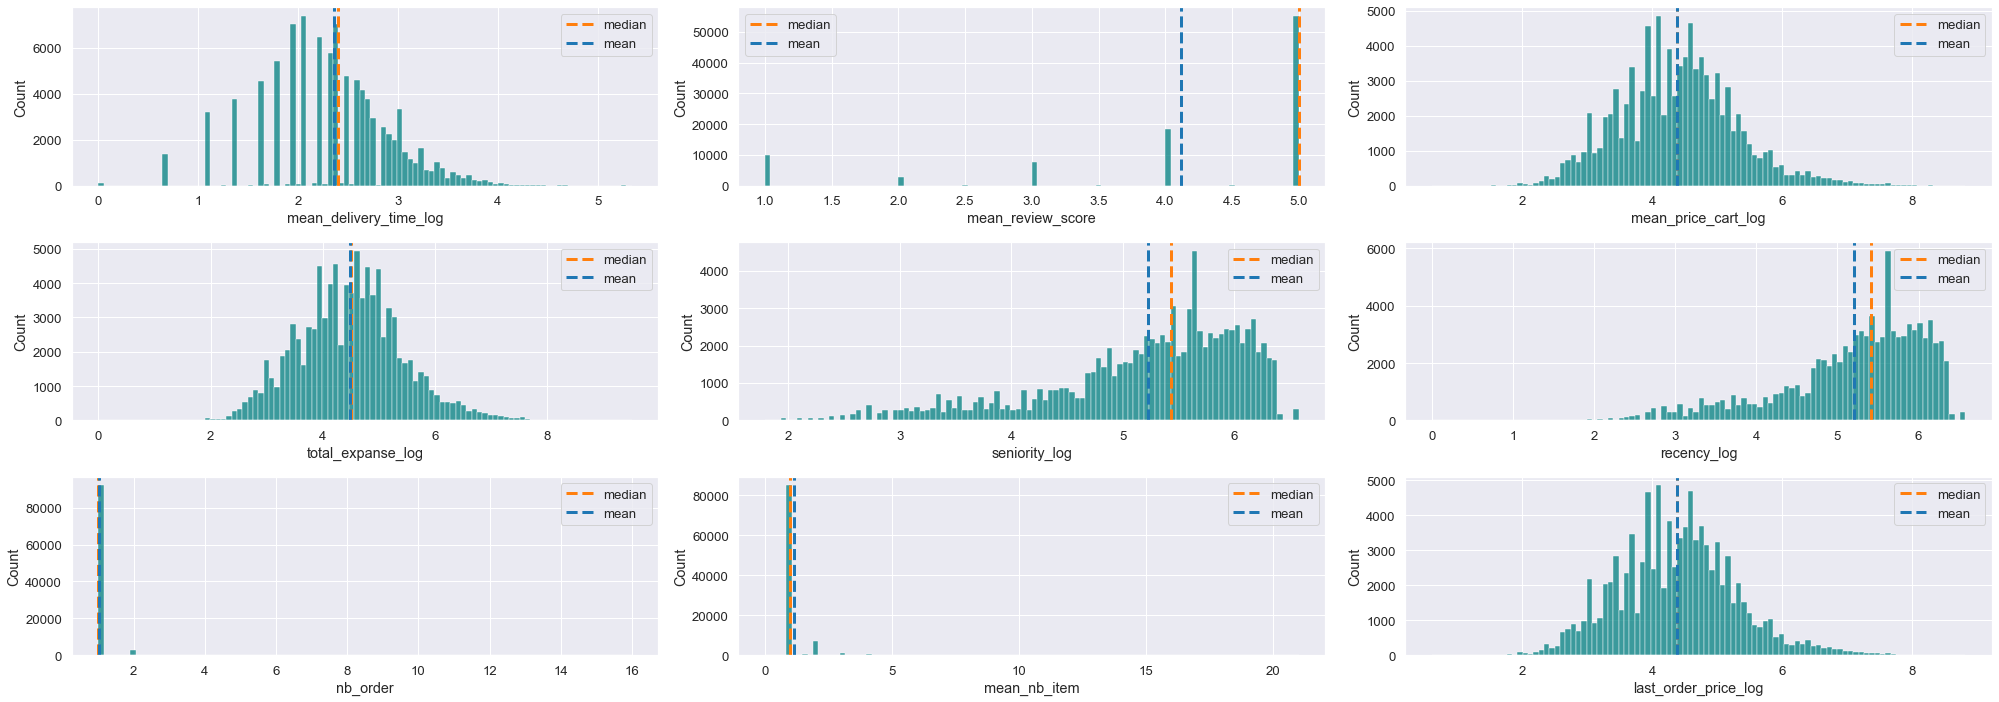

In [40]:
lst_variables = ['mean_delivery_time_log',
                 'mean_review_score',
                 'mean_price_cart_log',
                 'total_expanse_log',
                 'seniority_log',
                 'recency_log',
                 'nb_order',
                 'mean_nb_item',
                 'last_order_price_log']

sns.set(font_scale=1.2)

plt.figure(figsize=(28, 10))
i = 0
for var in lst_variables:
    ax = plt.subplot(3, 3, i + 1)
    g = sns.histplot(data=df_Customers, x=var,
                     bins=100,
                     color="teal")
    # Lignes verticales : médiane et moyenne
    median = df_Customers[var].median()
    mean = df_Customers[var].mean()
    g.axvline(x=median, color='tab:orange', linestyle='dashed', linewidth=3)
    g.axvline(x=mean, color='tab:blue', linestyle='dashed', linewidth=3)
    labels = ["median", "mean"]
    plt.legend(labels=labels)
    i += 1
plt.tight_layout()

### <a name="C10"> E) Analyse de la relation entre les variables </a>

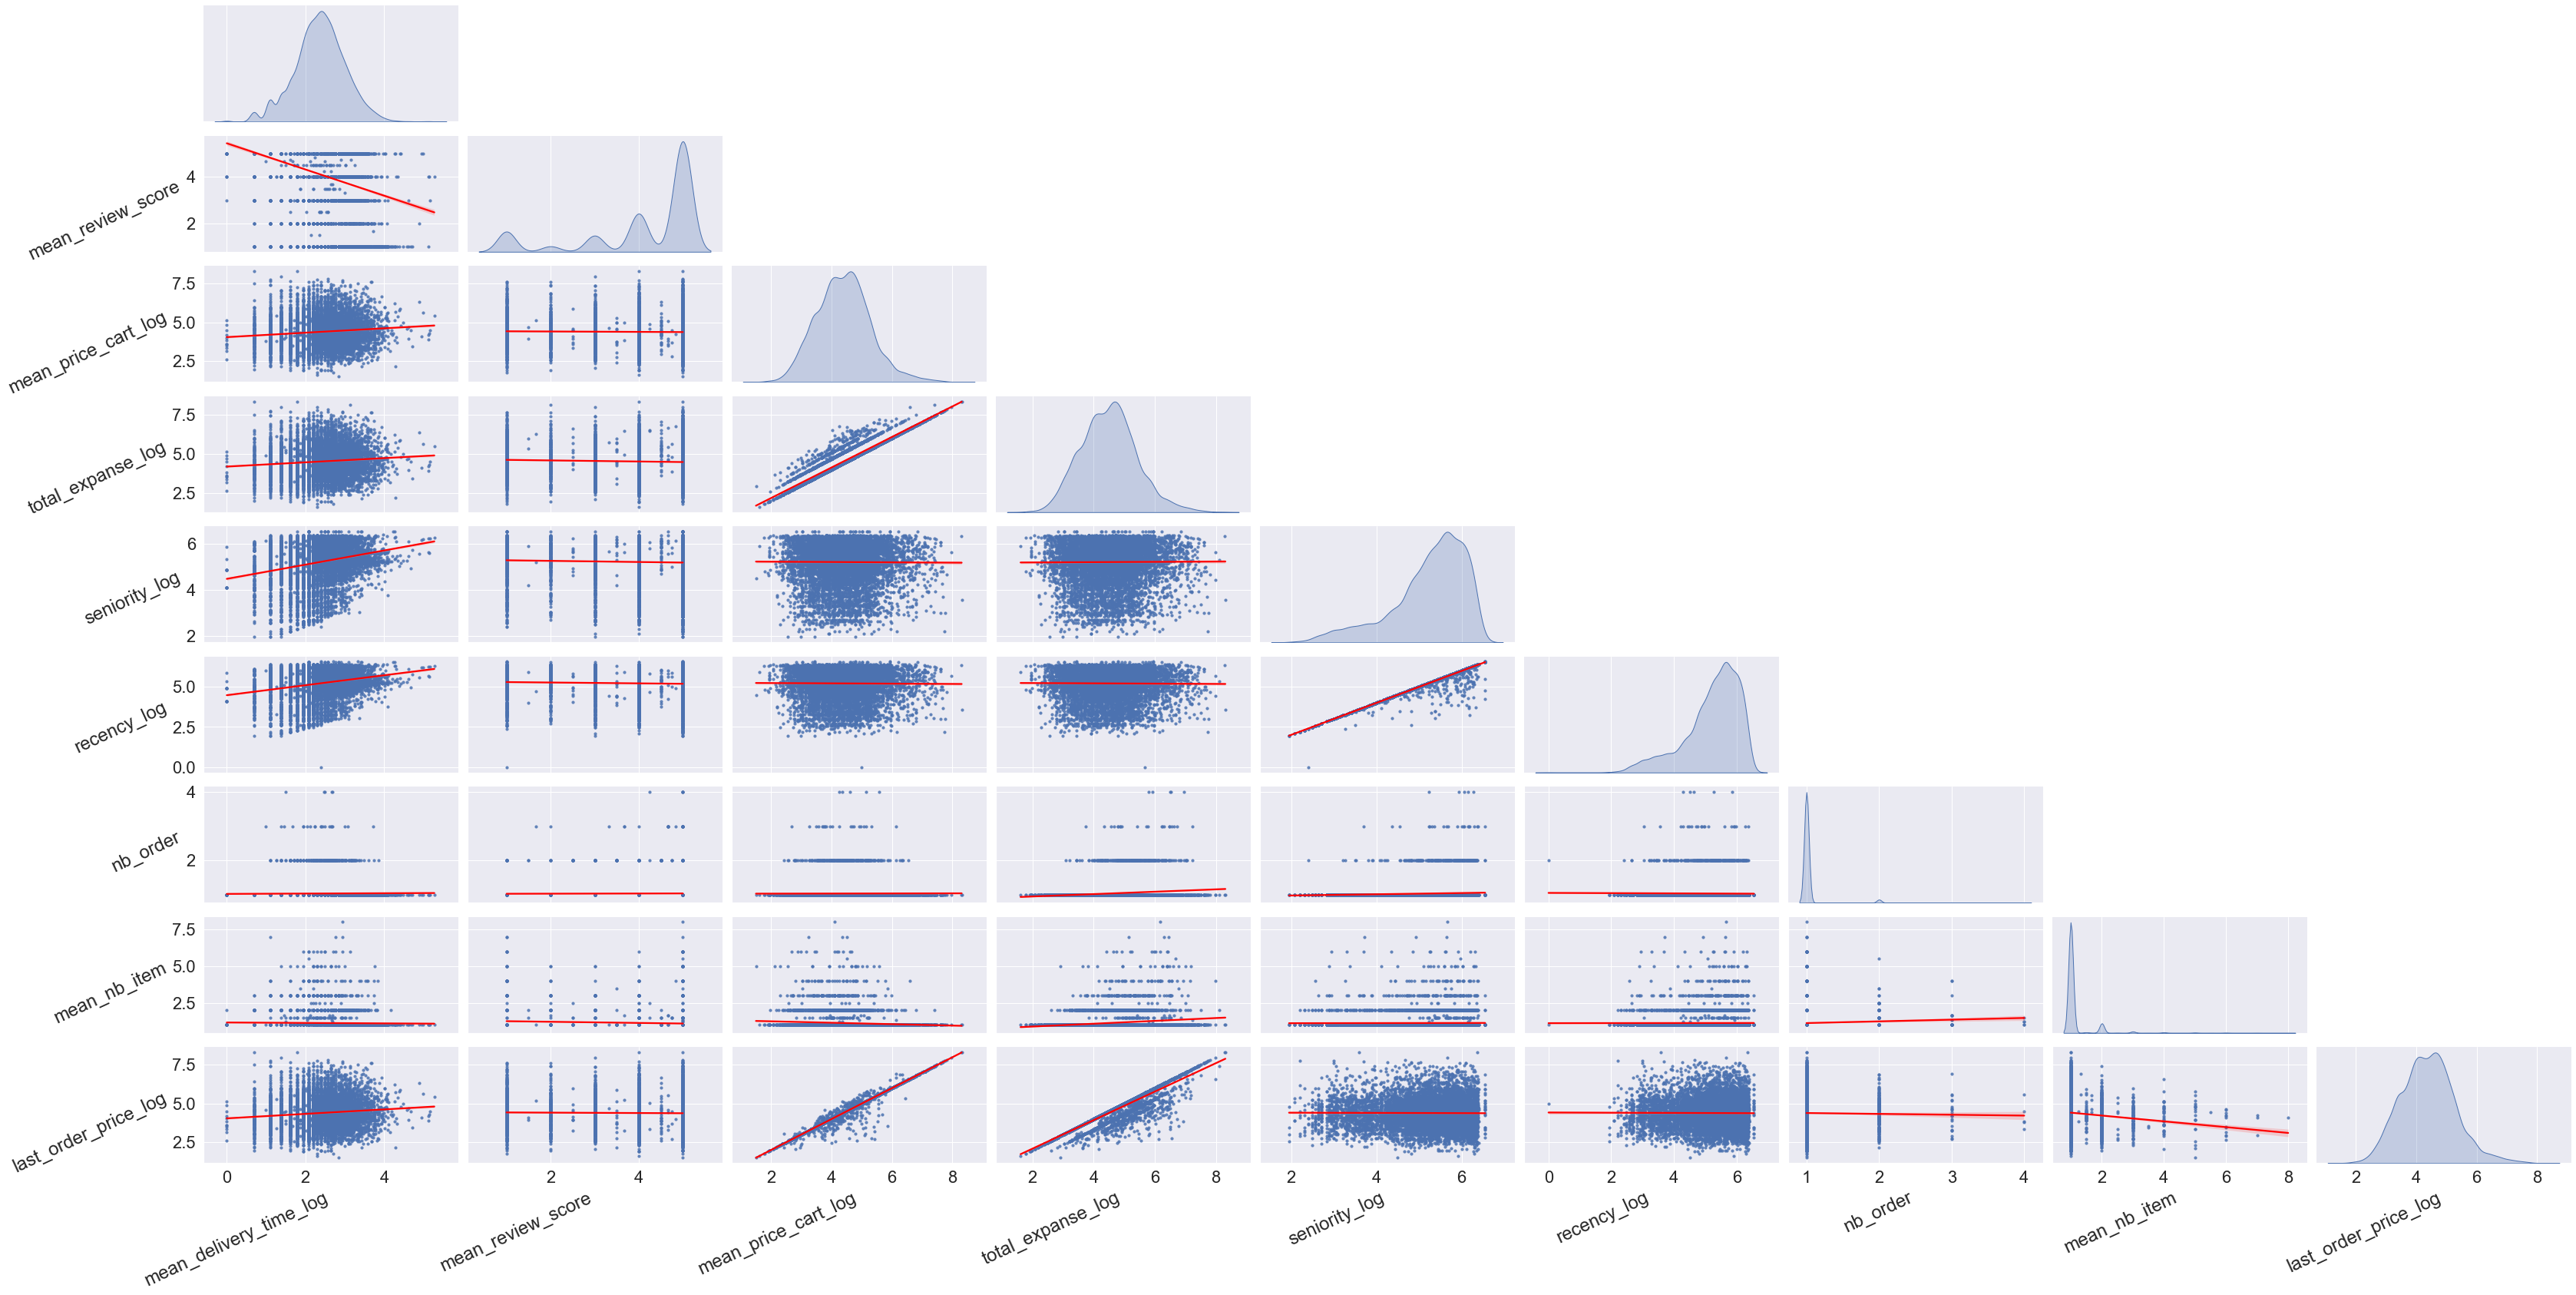

In [41]:
# Analyse de la relation entre les variables architecturales (pairplot)

sns.set(font_scale=2)

g = sns.pairplot(df_Customers[lst_variables].sample(frac=.1), corner=True, kind='reg',
                 plot_kws={'line_kws': {'color': 'red'},
                           'scatter_kws': {'s': 10}},
                 diag_kind="kde", aspect=2)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation=25)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation=25)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

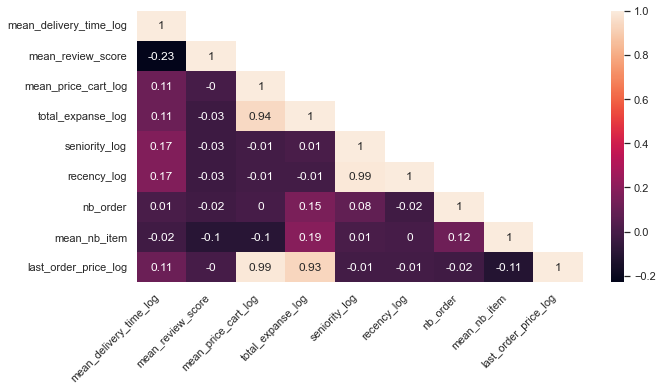

In [42]:
# Mesure du coeficient de corrélation (Non paramétrique : Spearman rank correlation) entre les variables.

corr = df_Customers[lst_variables].corr(method='spearman').round(2)

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (10, 5)

sns.set(font_scale=1, style='white')
hm = sns.heatmap(corr, annot=True, mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
hm.set(xlabel=None, ylabel=None)
plt.show()

Objectif suivant : Segmenter les clients en fonction des variables d'intérêts 

- Stratégie RFM : 
    - R- Récence = date de la dernière commande
    - F- Fréquence des commande (nb de commande) 
    - M- Montant total dépensé
    
&nbsp;
- Autres variables:
    - Note moyenne
    - Temps de livraison moyen
    - Montant du panier moyen
    - Nombre d'article moyen par commande
    - % d'utilisation de la carte de crédit